<a href="https://colab.research.google.com/github/frasermcghan/Year3Project/blob/master/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

import numpy as np

In [0]:
bs = 64

# Unzip Input Files

In [0]:
%%capture
!unzip drive/My\ Drive/Project/Thermal.zip

In [0]:
%%capture
!unzip drive/My\ Drive/Project/current/GASF_current.zip

In [0]:
%%capture
!unzip drive/My\ Drive/Project/current/GADF_current.zip

In [0]:
%%capture
!unzip drive/My\ Drive/Project/vibration/GASF_vibration.zip

In [0]:
%%capture
!unzip drive/My\ Drive/Project/vibration/GADF_vibration.zip

# Single Inputs

## Thermal

In [0]:
thermal_path = 'Thermal'

In [0]:
thermal_data = (ImageList.from_folder(thermal_path)
        .split_by_folder(train='train', valid='valid')
        .label_from_folder()
        .transform(get_transforms())
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [0]:
thermal_data_test = (ImageList.from_folder(thermal_path)
        .split_by_folder(train='train', valid='test')
        .label_from_folder()
        .transform(get_transforms())
        .databunch(bs=bs)
        .normalize(imagenet_stats))

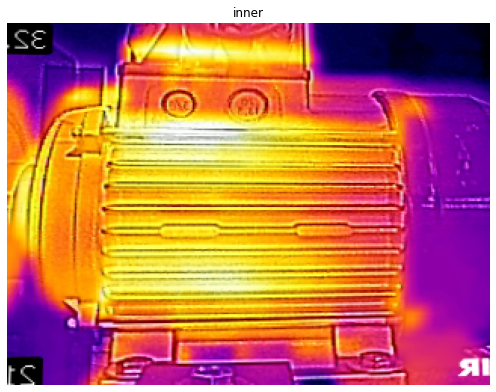

In [0]:
thermal_data.show_batch(rows=1, figsize=(7,6))

In [0]:
thermal_model = cnn_learner(thermal_data, models.resnet34, metrics=accuracy)
thermal_model.fit_one_cycle(50)

epoch,train_loss,valid_loss,accuracy,time
0,2.686788,1.319325,0.554348,00:19
1,2.156123,0.483395,0.883152,00:18
2,1.661445,0.231173,0.942935,00:17
3,1.227936,0.123434,0.972826,00:17
4,0.913081,0.063168,0.989130,00:17
5,0.687967,0.025657,0.994565,00:17
6,0.528913,0.019136,1.000000,00:17
7,0.404090,0.008951,1.000000,00:17
8,0.324316,0.007780,1.000000,00:17
9,0.268788,0.012158,0.994565,00:17


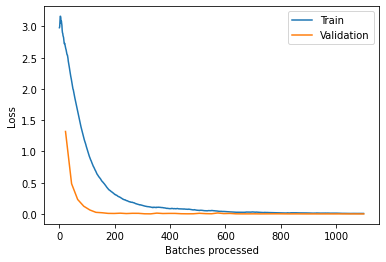

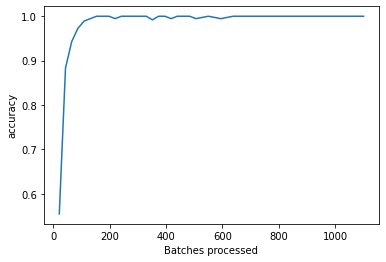

In [0]:
thermal_losses = thermal_model.recorder.plot_losses(return_fig=True)
thermal_metrics = thermal_model.recorder.plot_metrics(return_fig=True)

In [0]:
thermal_losses.axes[0].set_xlabel('Batches Processed')
thermal_losses.axes[0].set_ylabel('Loss')
thermal_losses.set_tight_layout
thermal_losses.suptitle('Thermal Model Loss')
thermal_losses.savefig('thermal_losses.png', dpi=300)

In [0]:
thermal_metrics.axes[0].set_xlabel('Batches Processed')
thermal_metrics.axes[0].set_ylabel('Accuracy')
thermal_metrics.set_tight_layout
thermal_metrics.suptitle('Thermal Model Accuracy')
thermal_metrics.savefig('thermal_metrics.png', dpi=300)

In [0]:
thermal_model_accuracies = []

for i in range(5):
    thermal_model = cnn_learner(thermal_data, models.resnet34, metrics=accuracy)
    thermal_model.fit_one_cycle(50)
    thermal_model_accuracies.append(max(thermal_model.recorder.metrics))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.731033,1.389071,0.445652,00:18
1,2.118377,0.623178,0.750000,00:18
2,1.621418,0.277856,0.910326,00:18
3,1.217295,0.124286,0.967391,00:18
4,0.905614,0.062615,0.989130,00:18
5,0.684689,0.036308,0.991848,00:17
6,0.537899,0.018715,0.997283,00:18
7,0.424757,0.014055,0.997283,00:17
8,0.339088,0.024141,0.991848,00:18
9,0.267259,0.033603,0.991848,00:18


epoch,train_loss,valid_loss,accuracy,time
0,2.928421,1.697698,0.421196,00:16
1,2.307772,0.633651,0.788043,00:16
2,1.766805,0.256162,0.940217,00:16
3,1.310773,0.156767,0.948370,00:16
4,0.990332,0.083463,0.975543,00:16
5,0.743039,0.075024,0.975543,00:16
6,0.570485,0.034710,0.991848,00:16
7,0.436912,0.019793,0.997283,00:17
8,0.332871,0.024933,0.991848,00:16
9,0.266909,0.010469,0.997283,00:16


epoch,train_loss,valid_loss,accuracy,time
0,2.835840,1.726157,0.342391,00:16
1,2.250364,0.600272,0.839674,00:16
2,1.720304,0.239221,0.929348,00:17
3,1.269677,0.121765,0.970109,00:17
4,0.941849,0.139805,0.956522,00:17
5,0.714504,0.082619,0.972826,00:17
6,0.547806,0.021893,0.997283,00:19
7,0.428461,0.021327,0.994565,00:16
8,0.339244,0.028207,0.994565,00:17
9,0.280800,0.030905,0.989130,00:17


epoch,train_loss,valid_loss,accuracy,time
0,2.717590,1.460828,0.467391,00:17
1,2.173461,0.690488,0.766304,00:17
2,1.647941,0.323259,0.894022,00:17
3,1.222955,0.146605,0.964674,00:17
4,0.914548,0.104857,0.970109,00:17
5,0.680805,0.046440,0.991848,00:16
6,0.514085,0.048545,0.983696,00:16
7,0.407469,0.047039,0.986413,00:17
8,0.330372,0.023911,0.989130,00:17
9,0.260627,0.020540,0.991848,00:16


epoch,train_loss,valid_loss,accuracy,time
0,2.688950,1.459149,0.442935,00:18
1,2.167411,0.618752,0.779891,00:18
2,1.656411,0.242487,0.929348,00:18
3,1.241184,0.108435,0.964674,00:17
4,0.936081,0.045206,0.991848,00:18
5,0.703614,0.025236,0.997283,00:18
6,0.539143,0.010693,1.000000,00:17
7,0.421040,0.024402,0.991848,00:17
8,0.340967,0.007357,1.000000,00:17
9,0.287702,0.021521,0.991848,00:17


## Current

### GASF

In [0]:
current_GASF_path = 'GASF_current'

In [0]:
current_GASF_data = (ImageList.from_folder(current_GASF_path)
        .split_by_folder(train='train', valid='valid')
        .label_from_folder()
        .transform(get_transforms())
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [0]:
current_GASF_data_test = (ImageList.from_folder(current_GASF_path)
        .split_by_folder(train='train', valid='test')
        .label_from_folder()
        .transform(get_transforms())
        .databunch(bs=bs)
        .normalize(imagenet_stats))

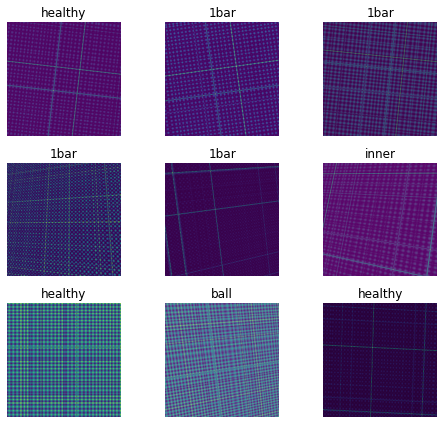

In [0]:
current_GASF_data.show_batch(rows=3, figsize=(7,6))

In [0]:
current_GASF_model = cnn_learner(current_GASF_data, models.resnet34, metrics=accuracy)
current_GASF_model.fit_one_cycle(50)

epoch,train_loss,valid_loss,accuracy,time
0,3.134803,2.404302,0.160326,00:14
1,2.955070,2.168828,0.198370,00:14
2,2.798597,2.035283,0.247283,00:14
3,2.711013,1.966590,0.290761,00:14
4,2.584241,1.928373,0.271739,00:14
5,2.503481,1.951210,0.290761,00:14
6,2.446141,1.883557,0.298913,00:14
7,2.339831,1.854005,0.293478,00:14
8,2.217869,1.861349,0.328804,00:14
9,2.147708,1.745769,0.320652,00:14


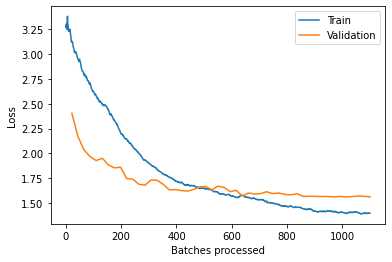

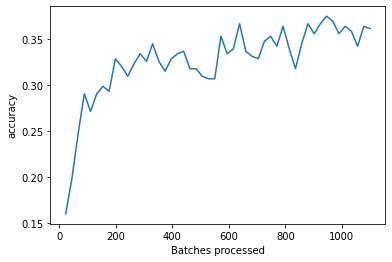

In [0]:
current_GASF_losses = current_GASF_model.recorder.plot_losses(return_fig=True)
current_GASF_metrics = current_GASF_model.recorder.plot_metrics(return_fig=True)

In [0]:
current_GASF_losses.axes[0].set_xlabel('Batches Processed')
current_GASF_losses.axes[0].set_ylabel('Loss')
current_GASF_losses.set_tight_layout
current_GASF_losses.suptitle('GASF Current Model Loss')
current_GASF_losses.savefig('GASF_current_losses.png', dpi=300)

In [0]:
current_GASF_metrics.axes[0].set_xlabel('Batches Processed')
current_GASF_metrics.axes[0].set_ylabel('Accuracy')
current_GASF_metrics.set_tight_layout
current_GASF_metrics.suptitle('GASF Current Model Accuracy')
current_GASF_metrics.savefig('GASF_current_metrics.png', dpi=300)

In [0]:
current_GASF_model_accuracies = []

for i in range(5):
    current_GASF_model = cnn_learner(current_GASF_data, models.resnet34, metrics=accuracy)
    current_GASF_model.unfreeze(); current_GASF_model.fit_one_cycle(50)
    current_GASF_model_accuracies.append(max(current_GASF_model.recorder.metrics))

epoch,train_loss,valid_loss,accuracy,time
0,2.947597,2.198709,0.206522,00:14
1,2.830665,2.174917,0.247283,00:14
2,2.669468,2.062257,0.282609,00:14
3,2.573336,2.034097,0.266304,00:14
4,2.473114,2.015465,0.285326,00:14
5,2.364365,1.942409,0.298913,00:14
6,2.275090,1.751444,0.347826,00:14
7,2.157427,1.863122,0.290761,00:14
8,2.030202,1.676548,0.328804,00:14
9,1.893288,1.582934,0.388587,00:14


epoch,train_loss,valid_loss,accuracy,time
0,3.166272,2.326393,0.146739,00:14
1,2.903830,2.171922,0.203804,00:14
2,2.772962,2.002408,0.260870,00:14
3,2.628667,1.919270,0.317935,00:14
4,2.521298,1.911772,0.298913,00:14
5,2.389523,1.867155,0.312500,00:15
6,2.302032,1.828801,0.320652,00:15
7,2.185486,1.697011,0.317935,00:15
8,2.075583,1.801577,0.317935,00:15
9,1.958500,1.693011,0.312500,00:15


epoch,train_loss,valid_loss,accuracy,time
0,3.078736,2.332996,0.138587,00:14
1,2.878025,2.183701,0.244565,00:14
2,2.748508,2.097987,0.241848,00:14
3,2.634496,1.971020,0.277174,00:14
4,2.572601,1.942350,0.277174,00:14
5,2.440561,1.954291,0.293478,00:14
6,2.335211,1.890407,0.304348,00:14
7,2.195892,1.836368,0.339674,00:14
8,2.065424,1.695685,0.358696,00:14
9,1.968877,1.712317,0.404891,00:14


epoch,train_loss,valid_loss,accuracy,time
0,2.987733,2.218926,0.187500,00:15
1,2.854873,2.047319,0.258152,00:15
2,2.725934,1.969794,0.290761,00:14
3,2.617221,1.918851,0.301630,00:15
4,2.517358,1.850269,0.307065,00:14
5,2.422674,1.814533,0.320652,00:14
6,2.322845,1.872666,0.342391,00:14
7,2.202941,1.765739,0.342391,00:15
8,2.067515,1.857320,0.282609,00:16
9,1.946174,1.887182,0.309783,00:15


epoch,train_loss,valid_loss,accuracy,time
0,2.956274,2.158253,0.228261,00:14
1,2.818673,2.131067,0.255435,00:14
2,2.661436,2.035036,0.255435,00:14
3,2.583702,1.977036,0.263587,00:14
4,2.485149,1.994150,0.304348,00:14
5,2.416319,1.888295,0.296196,00:14
6,2.317380,1.960405,0.334239,00:14
7,2.182594,1.840083,0.304348,00:14
8,2.056409,1.726331,0.328804,00:14
9,1.940659,1.729497,0.315217,00:14


### GADF

In [0]:
current_GADF_path = 'GADF_current'

In [0]:
current_GADF_data = (ImageList.from_folder(current_GADF_path)
        .split_by_folder(train='train', valid='valid')
        .label_from_folder()
        .transform(get_transforms())
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [0]:
current_GADF_data_test = (ImageList.from_folder(current_GADF_path)
        .split_by_folder(train='train', valid='test')
        .label_from_folder()
        .transform(get_transforms())
        .databunch(bs=bs)
        .normalize(imagenet_stats))

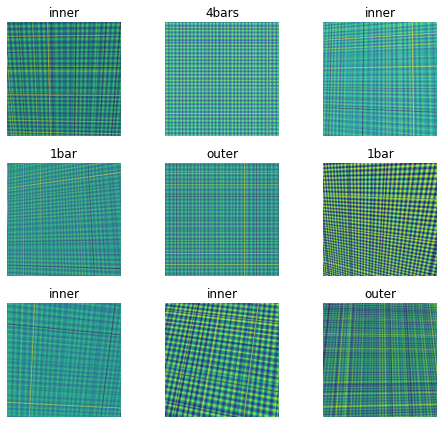

In [0]:
current_GADF_data.show_batch(rows=3, figsize=(7,6))

In [0]:
current_GADF_model = cnn_learner(current_GADF_data, models.resnet34, metrics=accuracy)
current_GADF_model.fit_one_cycle(50)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.056149,2.253448,0.230978,00:14
1,2.860940,2.113781,0.274457,00:14
2,2.752847,2.037380,0.288043,00:14
3,2.615408,1.952783,0.301630,00:13
4,2.514949,1.900094,0.301630,00:14
5,2.456342,1.881431,0.307065,00:13
6,2.351078,1.983765,0.296196,00:13
7,2.281356,1.894843,0.307065,00:14
8,2.200356,1.810906,0.309783,00:14
9,2.125628,1.714765,0.358696,00:13


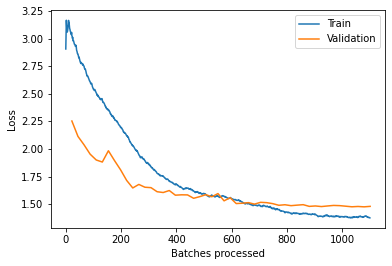

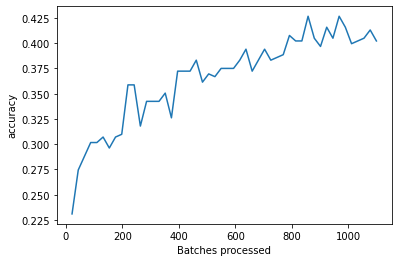

In [0]:
current_GADF_losses = current_GADF_model.recorder.plot_losses(return_fig=True)
current_GADF_metrics = current_GADF_model.recorder.plot_metrics(return_fig=True)

In [0]:
current_GADF_losses.axes[0].set_xlabel('Batches Processed')
current_GADF_losses.axes[0].set_ylabel('Loss')
current_GADF_losses.set_tight_layout
current_GADF_losses.suptitle('GADF Current Model Loss')
current_GADF_losses.savefig('GADF_current_losses.png', dpi=300)

In [0]:
current_GADF_metrics.axes[0].set_xlabel('Batches Processed')
current_GADF_metrics.axes[0].set_ylabel('Accuracy')
current_GADF_metrics.set_tight_layout
current_GADF_metrics.suptitle('GADF Current Model Accuracy')
current_GADF_metrics.savefig('GADF_current_metrics.png', dpi=300)

In [0]:
current_GADF_model_accuracies = []

for i in range(5):
    current_GADF_model = cnn_learner(current_GADF_data, models.resnet34, metrics=accuracy)
    current_GADF_model.unfreeze(); current_GADF_model.fit_one_cycle(50)
    current_GADF_model_accuracies.append(max(current_GADF_model.recorder.metrics))

epoch,train_loss,valid_loss,accuracy,time
0,2.912627,2.104107,0.225543,00:14
1,2.717693,1.974743,0.285326,00:13
2,2.630351,1.814089,0.282609,00:13
3,2.518095,1.747686,0.331522,00:13
4,2.419086,1.746267,0.334239,00:13
5,2.268713,1.915578,0.350543,00:14
6,2.150366,1.741212,0.342391,00:13
7,1.996256,1.615252,0.366848,00:13
8,1.885636,1.589829,0.366848,00:13
9,1.790687,1.541414,0.364130,00:13


epoch,train_loss,valid_loss,accuracy,time
0,3.108905,2.166947,0.209239,00:13
1,2.879407,2.027112,0.269022,00:12
2,2.727846,1.979332,0.279891,00:13
3,2.581074,1.851251,0.307065,00:13
4,2.459625,1.826433,0.315217,00:13
5,2.327850,1.785426,0.312500,00:13
6,2.215091,1.901144,0.312500,00:13
7,2.071696,1.693099,0.361413,00:13
8,1.936597,1.675707,0.334239,00:13
9,1.813360,1.665200,0.396739,00:13


epoch,train_loss,valid_loss,accuracy,time
0,3.073014,2.133684,0.225543,00:16
1,2.854948,2.057615,0.247283,00:15
2,2.692743,1.967028,0.288043,00:15
3,2.573673,1.832386,0.312500,00:15
4,2.435739,1.824416,0.317935,00:15
5,2.281187,1.750677,0.304348,00:15
6,2.148937,1.641620,0.336957,00:16
7,2.035300,1.597258,0.328804,00:16
8,1.932411,1.570467,0.353261,00:15
9,1.822880,1.536831,0.385870,00:15


epoch,train_loss,valid_loss,accuracy,time
0,3.055068,2.145256,0.214674,00:15
1,2.852209,1.951722,0.266304,00:17
2,2.661827,1.835853,0.290761,00:15
3,2.522861,1.715082,0.336957,00:15
4,2.404551,1.847083,0.304348,00:14
5,2.271350,1.712262,0.331522,00:14
6,2.151436,1.663203,0.345109,00:15
7,2.030782,1.688495,0.361413,00:14
8,1.907115,1.595560,0.415761,00:14
9,1.821056,1.627269,0.410326,00:14


epoch,train_loss,valid_loss,accuracy,time
0,3.039614,2.168735,0.217391,00:13
1,2.827380,1.999907,0.296196,00:13
2,2.700427,1.851974,0.312500,00:13
3,2.560079,1.877473,0.320652,00:13
4,2.438051,1.854281,0.331522,00:13
5,2.307185,1.886856,0.358696,00:13
6,2.204943,1.757857,0.323370,00:13
7,2.067850,1.658981,0.372283,00:13
8,1.940381,1.636335,0.364130,00:13
9,1.823109,1.584779,0.358696,00:13


## Vibration

### GASF

In [0]:
vibration_GASF_path = 'GASF_vibration'

In [0]:
vibration_GASF_data = (ImageList.from_folder(vibration_GASF_path)
        .split_by_folder(train='train', valid='valid')
        .label_from_folder()
        .transform(get_transforms())
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [0]:
vibration_GASF_data_test = (ImageList.from_folder(vibration_GASF_path)
        .split_by_folder(train='train', valid='test')
        .label_from_folder()
        .transform(get_transforms())
        .databunch(bs=bs)
        .normalize(imagenet_stats))

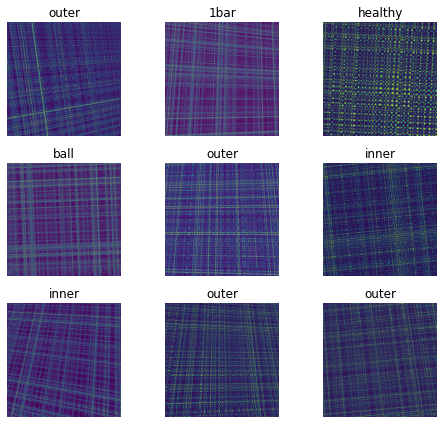

In [0]:
vibration_GASF_data.show_batch(rows=3, figsize=(7,6))

In [0]:
vibration_GASF_model = cnn_learner(vibration_GASF_data, models.resnet34, metrics=accuracy)
vibration_GASF_model.fit_one_cycle(50)

epoch,train_loss,valid_loss,accuracy,time
0,2.756445,1.905470,0.326087,00:14
1,2.481419,1.726185,0.358696,00:13
2,2.378727,1.651388,0.361413,00:13
3,2.260315,1.615646,0.399457,00:13
4,2.140887,1.592066,0.413043,00:13
5,2.084044,1.559225,0.410326,00:13
6,2.030995,1.591482,0.388587,00:13
7,1.926638,1.550285,0.361413,00:13
8,1.861065,1.654221,0.369565,00:13
9,1.764339,1.509108,0.375000,00:13


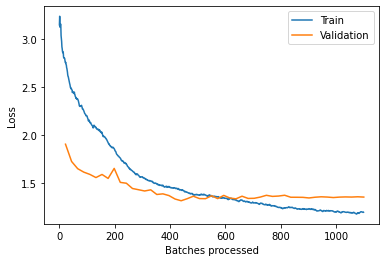

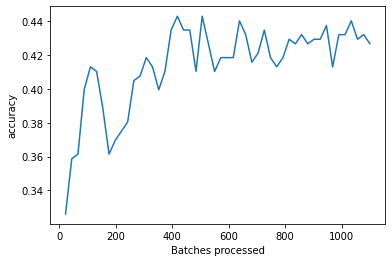

In [0]:
vibration_GASF_losses = vibration_GASF_model.recorder.plot_losses(return_fig=True)
vibration_GASF_metrics = vibration_GASF_model.recorder.plot_metrics(return_fig=True)

In [0]:
vibration_GASF_losses.axes[0].set_xlabel('Batches Processed')
vibration_GASF_losses.axes[0].set_ylabel('Loss')
vibration_GASF_losses.set_tight_layout
vibration_GASF_losses.suptitle('GASF Vibration Model Loss')
vibration_GASF_losses.savefig('GASF_vibration_losses.png', dpi=300)

In [0]:
vibration_GASF_metrics.axes[0].set_xlabel('Batches Processed')
vibration_GASF_metrics.axes[0].set_ylabel('Accuracy')
vibration_GASF_metrics.set_tight_layout
vibration_GASF_metrics.suptitle('GASF Vibration Model Accuracy')
vibration_GASF_metrics.savefig('GASF_vibration_metrics.png', dpi=300)

In [0]:
vibration_GASF_model_accuracies = []

for i in range(5):
    vibration_GASF_model = cnn_learner(vibration_GASF_data, models.resnet34, metrics=accuracy)
    vibration_GASF_model.unfreeze(); vibration_GASF_model.fit_one_cycle(50)
    vibration_GASF_model_accuracies.append(max(vibration_GASF_model.recorder.metrics))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.663811,1.729491,0.388587,00:12
1,2.456033,1.708040,0.383152,00:11
2,2.282891,1.610682,0.396739,00:11
3,2.142850,1.527178,0.383152,00:11
4,2.004277,1.567372,0.361413,00:11
5,1.885600,1.421082,0.434783,00:12
6,1.770679,1.363854,0.432065,00:11
7,1.676124,1.331005,0.432065,00:11
8,1.604257,1.357208,0.423913,00:11
9,1.536269,1.280838,0.456522,00:11


epoch,train_loss,valid_loss,accuracy,time
0,2.645232,1.690699,0.353261,00:11
1,2.452905,1.664680,0.391304,00:11
2,2.288121,1.674354,0.407609,00:11
3,2.151454,1.638128,0.377717,00:12
4,2.031412,1.519224,0.423913,00:12
5,1.907893,1.411819,0.396739,00:11
6,1.797163,1.352989,0.467391,00:11
7,1.686600,1.448864,0.388587,00:11
8,1.612316,1.415951,0.413043,00:11
9,1.553505,1.356406,0.456522,00:11


epoch,train_loss,valid_loss,accuracy,time
0,2.553508,1.771245,0.323370,00:11
1,2.315997,1.682876,0.377717,00:11
2,2.203443,1.609436,0.385870,00:11
3,2.117614,1.578357,0.410326,00:11
4,2.009489,1.527512,0.402174,00:11
5,1.899040,1.493239,0.399457,00:11
6,1.783821,1.480296,0.413043,00:11
7,1.688950,1.356208,0.434783,00:11
8,1.589579,1.398042,0.399457,00:11
9,1.536015,1.364755,0.399457,00:11


epoch,train_loss,valid_loss,accuracy,time
0,2.630858,1.752397,0.342391,00:11
1,2.376737,1.729952,0.345109,00:11
2,2.240543,1.621586,0.385870,00:11
3,2.113717,1.611112,0.391304,00:11


### GADF

In [0]:
vibration_GADF_path = 'GADF_vibration'

In [0]:
vibration_GADF_data = (ImageList.from_folder(vibration_GADF_path)
        .split_by_folder(train='train', valid='valid')
        .label_from_folder()
        .transform(get_transforms())
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [0]:
vibration_GADF_data_test = (ImageList.from_folder(vibration_GADF_path)
        .split_by_folder(train='train', valid='test')
        .label_from_folder()
        .transform(get_transforms())
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [0]:
vibration_GADF_data.show_batch(rows=3, figsize=(7,6))

In [0]:
vibration_GADF_model = cnn_learner(vibration_GADF_data, models.resnet34, metrics=accuracy)
vibration_GADF_model.fit_one_cycle(50)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.829140,1.824345,0.282609,00:14
1,2.643423,1.716107,0.366848,00:14
2,2.470049,1.683469,0.391304,00:14
3,2.340368,1.630395,0.383152,00:14
4,2.242912,1.594374,0.415761,00:14
5,2.159689,1.605641,0.394022,00:14
6,2.095853,1.602630,0.396739,00:14
7,2.027925,1.582464,0.388587,00:14
8,1.944178,1.515055,0.347826,00:14
9,1.857747,1.461421,0.404891,00:13


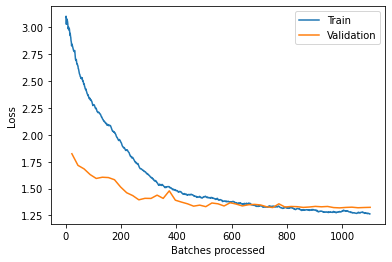

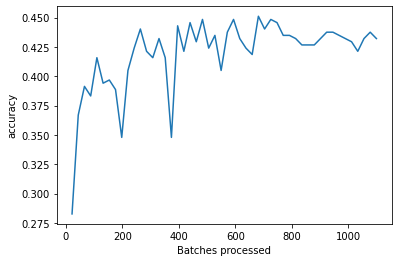

In [0]:
vibration_GADF_losses = vibration_GADF_model.recorder.plot_losses(return_fig=True)
vibration_GADF_metrics = vibration_GADF_model.recorder.plot_metrics(return_fig=True)

In [0]:
vibration_GADF_losses.axes[0].set_xlabel('Batches Processed')
vibration_GADF_losses.axes[0].set_ylabel('Loss')
vibration_GADF_losses.set_tight_layout
vibration_GADF_losses.suptitle('GADF Vibration Model Loss')
vibration_GADF_losses.savefig('GADF_vibration_losses.png', dpi=300)

In [0]:
vibration_GADF_metrics.axes[0].set_xlabel('Batches Processed')
vibration_GADF_metrics.axes[0].set_ylabel('Accuracy')
vibration_GADF_metrics.set_tight_layout
vibration_GADF_metrics.suptitle('GADF Vibration Model Accuracy')
vibration_GADF_metrics.savefig('GADF_vibration_metrics.png', dpi=300)

In [0]:
vibration_GADF_model_accuracies = []

for i in range(5):
    vibration_GADF_model = cnn_learner(vibration_GADF_data, models.resnet34, metrics=accuracy)
    vibration_GADF_model.unfreeze(); vibration_GADF_model.fit_one_cycle(50)
    vibration_GADF_model_accuracies.append(max(vibration_GADF_model.recorder.metrics))

# Multiple Inputs

## Custom Multiple Input Architecture

In [0]:
class stacked_resnet_cores(nn.Module):
    def __init__(self, dummy_databunch, num_images):
        super().__init__()
        self.resnets = [list(cnn_learner(dummy_databunch, models.resnet34).model.children())[0] for _ in range(num_images)]
        self.resnets = torch.nn.ModuleList(self.resnets)
        self.pool = AdaptiveConcatPool2d()
        
    def forward(self, x):
        outputs = []
        for k,j in enumerate(self.resnets):
            output = self.resnets[k](x[:,k*3:(k+1)*3,:,:])
            outputs.append(output)
        outputs = [self.pool(output) for output in outputs]
        output = torch.cat(outputs, dim=1).squeeze()
        return output

In [0]:
class multi_image_dataset(Dataset):
    def __init__(self, paths, train=False, valid=False):
        self.x = []
        for path in paths:
            if train:
                data = (ImageList.from_folder(path) 
                        .split_by_folder(train='train', valid='valid')
                        .label_from_folder()
                        ).train
                out = torch.cat([data[k][0].data.unsqueeze(-1) for k in range(len(data))], dim=-1)
                self.x.append(out)
            elif valid:
                data = (ImageList.from_folder(path) 
                        .split_by_folder(train='train', valid='test')
                        .label_from_folder()
                        ).valid
                out = torch.cat([data[k][0].data.unsqueeze(-1) for k in range(len(data))], dim=-1)
                self.x.append(out)

        self.x = torch.cat(self.x, dim=0)
        self.y = data.y
        self.length = out.size(-1)

    def __len__(self):
        return self.length
        
    
    def __getitem__(self, idx):
        return self.x[:,:,:,idx], torch.Tensor([int(self.y[idx].data)]).long().squeeze()

In [0]:
class multi_image_classifier_2(nn.Module):
    def __init__(self, dummy_databunch, num_images, lin_ftrs, nc, ps=0.2):
        super().__init__()
        self.cores = stacked_resnet_cores(dummy_databunch, num_images)
        nf = 1024 * num_images
        self.lin1 = nn.Linear(nf,512)
        self.lin2 = nn.Linear(512,nc)
        self.dp1 = nn.Dropout(ps)
        self.dp2 = nn.Dropout(ps)
    
    def forward(self,x):
        x = self.cores(x)
        x = self.lin2(self.dp2(self.lin1(self.dp1(x))))
        return x

## GASF Current & GASF Vibration

In [0]:
GASF_vibration_path = 'GASF_vibration'
GASF_current_path = 'GASF_current'

In [0]:
paths = [GASF_vibration_path,
         GASF_current_path]

In [0]:
tr_ds = multi_image_dataset(paths, train=True)
val_ds = multi_image_dataset(paths, valid=True)

In [0]:
tr_dl = DataLoader(tr_ds, batch_size = 64, shuffle=True)
val_dl = DataLoader(val_ds, batch_size = 64, shuffle=True)
md = DataBunch(tr_dl, val_dl)

In [0]:
data = (ImageList.from_folder(path=paths[0])
                      .split_by_folder(train='train', valid='valid')
                      .label_from_folder()
                      .transform(get_transforms())
                      .databunch(bs=64))

In [0]:
crit = nn.CrossEntropyLoss()
arch = multi_image_classifier_2(dummy_databunch=data, num_images=len(paths), lin_ftrs=None, nc=7, ps=0.5)

In [0]:
learn = Learner(md, arch, loss_func = crit, metrics=accuracy)
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,accuracy,time
0,2.747782,1.734156,0.372807,00:24
1,2.397347,1.906854,0.429825,00:23
2,2.163498,1.335707,0.521930,00:23
3,2.039690,1.915322,0.469298,00:23
4,2.029780,2.043740,0.486842,00:23
5,2.135845,1.564287,0.513158,00:23
6,2.073164,1.662613,0.517544,00:23
7,2.019762,2.055922,0.506579,00:23
8,1.917956,2.793352,0.489035,00:23
9,1.778530,1.446305,0.565789,00:23


In [0]:
current_vibration_GASF_losses = learn.recorder.plot_losses(return_fig=True)
current_vibration_GASF_metrics = learn.recorder.plot_metrics(return_fig=True)

NameError: ignored

In [0]:
current_vibration_GASF_losses.axes[0].set_xlabel('Batches Processed')
current_vibration_GASF_losses.axes[0].set_ylabel('Loss')
current_vibration_GASF_losses.set_tight_layout
current_vibration_GASF_losses.suptitle('GASF Current & GASF Vibration Model Loss')
current_vibration_GASF_losses.savefig('GASF_current_vibration_losses.png', dpi=300)

In [0]:
current_vibration_GASF_metrics.axes[0].set_xlabel('Batches Processed')
current_vibration_GASF_metrics.axes[0].set_ylabel('Accuracy')
current_vibration_GASF_metrics.set_tight_layout
current_vibration_GASF_metrics.suptitle('GASF Current & GASF Vibration Model Accuracy')
current_vibration_GASF_metrics.savefig('GASF_current_vibration_metrics.png', dpi=300)

In [0]:
combined_GASF_model_accuracies = []

for i in range(5):    
    learn = Learner(md, arch, loss_func = crit, metrics=accuracy)
    learn.fit_one_cycle(50)
    combined_GASF_model_accuracies.append(max(learn.metrics))

## GADF Current & GADF Vibration

In [0]:
GADF_vibration_path = 'GADF_vibration'
GADF_current_path = 'GADF_current'

In [0]:
paths = [GADF_vibration_path,
         GADF_current_path]

In [0]:
tr_ds = multi_image_dataset(paths, train=True)
val_ds = multi_image_dataset(paths, valid=True)

In [0]:
tr_dl = DataLoader(tr_ds, batch_size = 32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size = 32, shuffle=True)
md = DataBunch(tr_dl, val_dl)

In [0]:
data = (ImageList.from_folder(path=paths[0])
                      .split_by_folder(train='train', valid='valid')
                      .label_from_folder()
                      .transform(get_transforms())
                      .databunch(bs=32))

In [0]:
crit = nn.CrossEntropyLoss()
arch = multi_image_classifier_2(dummy_databunch=data, num_images=len(paths), lin_ftrs=None, nc=7, ps=0.5)

In [0]:
combined_GADF_model_accuracies = []

for i in range(5):    
    learn = Learner(md, arch, loss_func = crit, metrics=accuracy)
    learn.fit_one_cycle(50)
    combined_GADF_model_accuracies.append(max(learn.metrics))

## Summary Stats

In [0]:
accuracies = [thermal_model__accuracies,
              current_GASF_model_accuracies,
              current_GADF_model_accuracies,
              vibration_GASF_model_accuracies,
              vibration_GADF_model_accuracies,
              combined_GASF_model_accuracies,
              combined_GADF_model_accuracies]

In [0]:
mean_accuracies = [np.mean(i) for i in accuracies]
std_accuracies = [np.std(i) for i in accuracies]

In [0]:
print(mean_accuracies)
print(std_accuracies)

## Current & Vibration (GASF & GADF)

In [0]:
GASF_vibration_path = 'GASF_vibration'
GASF_current_path = 'GASF_current'
GADF_vibration_path = 'GADF_vibration'
GADF_current_path = 'GADF_current'

In [0]:
paths = [GASF_vibration_path,
         GADF_vibration_path,
         GASF_current_path,
         GASF_current_path]

In [0]:
tr_ds = multi_image_dataset(paths, train=True)
val_ds = multi_image_dataset(paths, valid=True)

In [0]:
tr_dl = DataLoader(tr_ds, batch_size = 32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size = 32, shuffle=True)
md = DataBunch(tr_dl, val_dl)

In [0]:
data = (ImageList.from_folder(path=paths[0])
                      .split_by_folder(train='train', valid='valid')
                      .label_from_folder()
                      .transform(get_transforms())
                      .databunch(bs=32))

In [0]:
crit = nn.CrossEntropyLoss()
arch = multi_image_classifier_2(dummy_databunch=data, num_images=len(paths), lin_ftrs=None, nc=7, ps=0.5)

In [0]:
learn = Learner(md, arch, loss_func = crit, metrics=accuracy)
learn.fit_one_cycle(10)

In [0]:
GAF_model_accuracies = []

for i in range(5):    
    learn = Learner(md, arch, loss_func = crit, metrics=accuracy)
    learn.fit_one_cycle(25)
    GAF_model_accuracies.append(max(learn.metrics))

## GASF & GADF & Thermal

In [0]:
GASF_vibration_path = 'GASF_vibration'
GADF_vibration_path = 'GADF_vibration'
GASF_current_path = 'GASF_current'
GADF_current_path = 'GADF_current'
thermal_path = 'Thermal'

In [0]:
paths = [GASF_vibration_path,
         GADF_vibration_path,
         GASF_current_path,
         GADF_current_path,
         thermal_path]

In [0]:
tr_ds = multi_image_dataset(paths, train=True)
val_ds = multi_image_dataset(paths, valid=True)

In [0]:
tr_dl = DataLoader(tr_ds, batch_size = 32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size = 32, shuffle=True)
md = DataBunch(tr_dl, val_dl)

In [0]:
data = (ImageList.from_folder(path=paths[0])
                      .split_by_folder(train='train', valid='valid')
                      .label_from_folder()
                      .transform(get_transforms())
                      .databunch(bs=32))

In [0]:
crit = nn.CrossEntropyLoss()
arch = multi_image_classifier_2(dummy_databunch=data, num_images=len(paths), lin_ftrs=None, nc=7, ps=0.5)

In [0]:
GAF_and_thermal_model_accuracies = []

for i in range(5):    
    learn = Learner(md, arch, loss_func = crit, metrics=accuracy)
    learn.fit_one_cycle(25)
    combined_GADF_model_accuracies.append(max(learn.metrics))

# Summary Stats

In [0]:
accuracies = [thermal_model__accuracies,
              current_GASF_model_accuracies,
              current_GADF_model_accuracies,
              vibration_GASF_model_accuracies,
              vibration_GADF_model_accuracies,
              combined_GASF_model_accuracies,
              combined_GADF_model_accuracies,
              GAF_model_accuracies,
              GAF_and_thermal_model_accuracies]

In [0]:
mean_accuracies = [np.mean(i) for i in accuracies]
std_accuracies = [np.std(i) for i in accuracies]

In [0]:
print(mean_accuracies)
print(std_accuracies)